<a href="https://colab.research.google.com/github/patofw/imf_master/blob/master/Notebooks/Intro_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disclaimer: No tengo derechos sobre estos datos. Son solo para objetivos académicos. 

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics as metrics
from pandas.plotting import scatter_matrix

In [37]:
# helper function
def regression_results(y_true, y_pred):
    """
    Devuelve los resultados de un modelo de regresión utilizando Sklearn
    :param y_true: matriz de valores reales. 
    :param y_pred: matriz de predicciones (debe ser igual de forma que y_true)
    :return: Imprime los resultados de un regresor
    """
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Varianza explicada: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [10]:
# Leemos el  DataFrame
url = 'https://raw.githubusercontent.com/patofw/imf_master/master/Notebooks/data/Advertising.csv'
data = pd.read_csv(url, index_col=0) # este dataset viene con índice
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


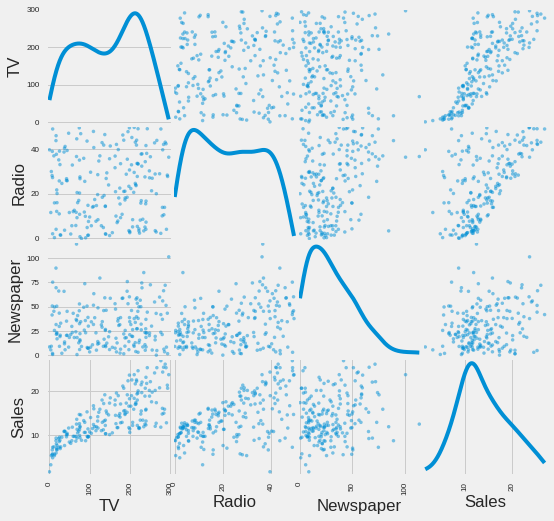

In [17]:
# Realizamos una exploración previa
plt.style.use('fivethirtyeight') # marcamos el estilo de los plots
scatter_matrix(data,figsize=(8, 8), diagonal='kde')
plt.show()

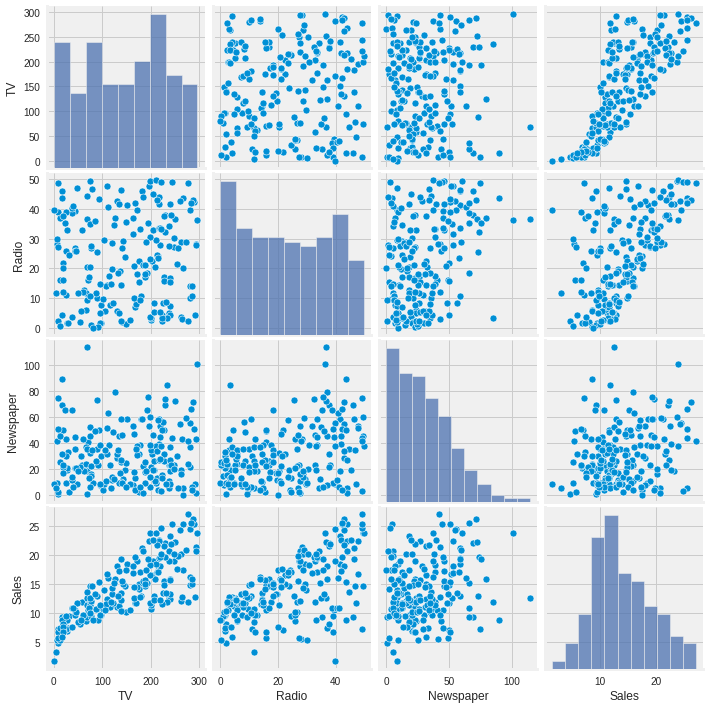

In [23]:
# lo mismo pero con otra librería 
sns.pairplot(data)
plt.show();

In [24]:
data.corr() # correlación 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


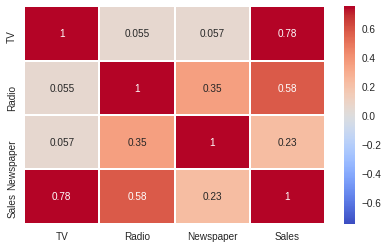

In [27]:
# Plot de correlación
sns.heatmap(data.corr(),annot=True,linewidths=1,
            cmap='coolwarm',vmin=-.75,vmax=.75)
plt.show();

# Modelo Lineal
Vamos a hacer un modelo sencillo de regresión lineal. Por ahora, nos saltaremos los pasos referentes a la comprobación de las asumpciones para ejecutar una regresión. Tampoco separaremos el Dataset entre datos de entrenamiento y validación. Eso lo veremos más adelante. 

In [43]:
# Separamos los datos entre variable objetivo y variables independientes
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols] # Independientes
y = data.Sales # Dependientes

# declaramos el modelo y realizamos el ajuste en los datos. 

lm = linear_model.LinearRegression()
lm.fit(X, y) # fit hace el ajuste


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Evaluamos el modelo 
pred = lm.predict(X) # Predict realiza la predicción
regression_results(y, pred) # Función que definimos para métricas

Varianza explicada:  0.8972
mean_squared_log_error:  0.0303
r2:  0.8972
MAE:  1.252
MSE:  2.7841
RMSE:  1.6686


In [45]:
# imprimimos coeficientes
coef_table =pd.DataFrame({'Variable': feature_cols, 
              'Coef': lm.coef_})
coef_table

,Variable,Coef
0,TV,0.045765
1,Radio,0.188530
2,Newspaper,-0.001037


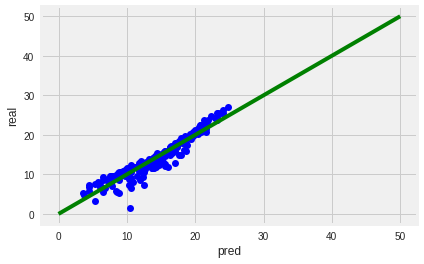

In [46]:

plt.plot(pred, y,'bo')
plt.plot([0,50],[0,50], 'g-') #linea diagonal
plt.xlabel('pred')
plt.ylabel('real')
plt.show()

# Hacemos lo mismo pero con árboles de Decisión

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor() # Modelo RF de regresión
rf_reg.fit(X, y) # Hacemos el ajuste

# Evaluamos el modelo 
pred_rf = rf_reg.predict(X)
regression_results(y, pred_rf) # Imprimimos resultados

Varianza explicada:  0.9974
mean_squared_log_error:  0.0013
r2:  0.9973
MAE:  0.2054
MSE:  0.0718
RMSE:  0.268


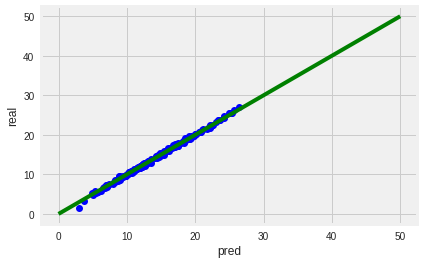

In [50]:
plt.plot(pred_rf, y,'bo')
plt.plot([0,50],[0,50], 'g-') #linea diagonal
plt.xlabel('pred')
plt.ylabel('real')
plt.show()

# Qué podemos concluir de este resultado?